##### Implementation of Algorithm for Inscribed Rectangle extraction of Quadrilaterals

Motivated by Implementation of Algorithm for finding largest inscribed rectangle in polygon

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Polygon, Point

##### Helper functionality: 

In [2]:
def counter_clockwise(vertices):
    """
    given a set of vertices v_1, ... v_4 in R_2 as python lists:
    returns the set of vertices ordered counter-clockwise.
    """
    #First center the set of points:
    mX, mY = 0,0
    for x,y in vertices:
        mX += (x / 4)
        mY += (y / 4)
    
    for x,y in vertices:
        x -= mX
        y -= mY
    
    #Then compute their angles
    for vertex in vertices:
        x,y = vertex
        angle = math.degrees(math.atan2(y,x))
        angle = angle if angle >= 0 else -angle + 180
        vertex.append(angle)
    
    #sort based off of the angles
    vertices.sort(reverse=True, key=lambda tup: tup[2])
    
    #remove the angle measurement and decenter points
    for val in vertices:
        val.pop()
        x,y = val
        x += mX
        y += mY
        
    return vertices

def edges(vertices):
    """
    given a set of four vertices v_1, ..., v_4
    returns v_1,v_2 - v_2,v_3 - ... v_4,v_1
    """
    edges = []
    for i in range(4):
        p1, p2 = vertices[i % 4], vertices[(i + 1) % 4]
        edges.append((p1,p2))
    return edges

def vertices(edges):
    """
    given a set of four edges, returns the corresponding vertices
    """
    return [ edges[0][0], edges[1][0], edges[2][0], edges[3][0]]

def interior_line(line, vertices):
    for start, end in edges(SAR(vertices)):
        l_start, l_end = line
        if l_start == start or l_start == end or l_end == end or l_end == start:
            return False
    return True

In [3]:
def line_intersection(line1, line2):
    if disjoint_segments(line1, line2):
        return
    xdiff = (line1[0][0] - line1[1][0], line2[0][0] - line2[1][0])
    ydiff = (line1[0][1] - line1[1][1], line2[0][1] - line2[1][1])
    
    def det(a, b):
        return a[0] * b[1] - a[1] * b[0]

    div = det(xdiff, ydiff)
    if div == 0:
        return 

    d = (det(*line1), det(*line2))
    x = det(d, xdiff) / div
    y = det(d, ydiff) / div
    
#     #verifying it doesn't intersect at end points
#     if x == line1[0][0] or x == line1[1][0] or x == line2[0][0] or x == line2[1][0] or \
#        y == line1[0][1] or y == line1[1][1] or y == line2[0][1] or y == line2[1][1]:
    return (x,y)
    

In [4]:
def disjoint_segments(line1, line2):
    start_1, end_1, start_2, end_2 = line1[0], line1[1], line2[0], line2[1]
     
    x_1, x_2, x_3, x_4 = start_1[0], end_1[0], start_2[0], end_2[0]
    y_1, y_2, y_3, y_4 = start_1[1], end_1[1], start_2[1], end_2[1]
    
    #check for x intersection
    if (x_1 < x_3 and x_1 < x_4 and x_2 < x_3 and x_2 < x_4) or \
       (x_1 > x_3 and x_1 > x_4 and x_2 > x_3 and x_2 > x_4):
        return True
    
    if (y_1 < y_3 and y_1 < x_4 and y_2 < y_3 and y_2 < y_4) or \
       (y_1 > y_3 and y_1 > x_4 and y_2 > y_3 and y_2 > y_4):
        return True
    return False
    

In [5]:
#[0.0, 1.6666666666666667] [[0.4, 1.0], [1.0, 0.0]] [[0.0, -2.0], [0.0, 2.1]]
line_intersection([[0.4, 1.0], [1.0, 0.0]], [[0.0, -2.0], [0.0, 2.1]])
disjoint_segments([[0.4, 1.0], [1.0, 0.0]], [[0.0, -2.0], [0.0, 2.1]])

True

In [6]:
points = [(1,4),(2,-3),(-1,-4),(-0.5,1)]

In [7]:
edge_pts = edges(points)

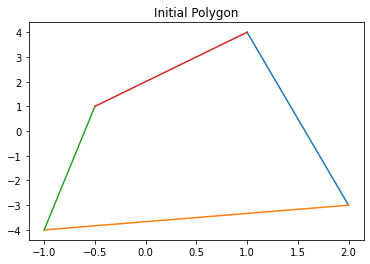

In [8]:
fig = plt.figure()

plt.title('Initial Polygon')
for edge in edge_pts:
    x_1,x_2 = edge[0][0], edge[1][0]
    y_1,y_2 = edge[0][1], edge[1][1]
    plt.plot([x_1,x_2], [y_1,y_2])

plt.savefig('initial_polygon.png', format='png')

##### Find smallest containing rectangle (SAR) of polygon

In [9]:
def SAR(vertices):
    """
    args: vertices v_1,...,v_4
    returns edges of rectangle containing the polygon given by the vertices
    """
    max_x, max_y, min_x, min_y = float('-inf'), float('-inf'), float('inf'), float('inf')
    for x,y in vertices:
        max_x = max_x if max_x > x else x
        max_y = max_y if max_y > y else y
        min_x = min_x if min_x < x else x
        min_y = min_y if min_y < y else y
    
    rectangle_vertices = [(min_x,min_y), (min_x,max_y), (max_x, max_y), (max_x, min_y)]
    return rectangle_vertices

In [10]:
rec_edges = edges(SAR(points))

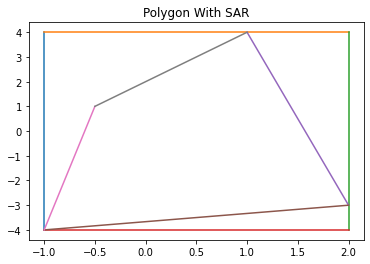

In [11]:
#verifying SAR functionality
fig = plt.figure()

plt.title('Polygon With SAR')

for edge in rec_edges:
    x_1,x_2 = edge[0][0], edge[1][0]
    y_1,y_2 = edge[0][1], edge[1][1]
    plt.plot([x_1,x_2], [y_1,y_2])

for edge in edge_pts:
    x_1,x_2 = edge[0][0], edge[1][0]
    y_1,y_2 = edge[0][1], edge[1][1]
    plt.plot([x_1,x_2], [y_1,y_2])

plt.savefig('Polygon with SAR.png', format='png')

#### Drawing horizontal and vertical lines

In [12]:
def vertical_lines(vertices):
    SAR_vertices = SAR(vertices)
    min_y, max_y = SAR_vertices[0][1], SAR_vertices[1][1]
    v_lines = []
    for x, _ in vertices:
        start, end = (x, min_y), (x, max_y)
        v_lines.append((start, end))
    return v_lines

In [13]:
def horizontal_lines(vertices):
    SAR_vertices = SAR(vertices)
    min_x, max_x = SAR_vertices[0][0], SAR_vertices[2][0]
    h_lines = []
    for _, y in vertices:
        start, end = (min_x, y), (max_x, y)
        h_lines.append((start,end))
    return h_lines

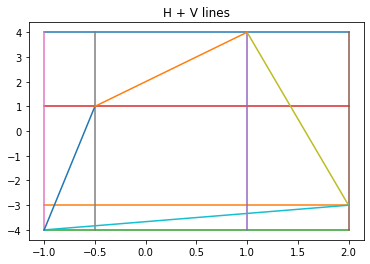

In [14]:
fig = plt.figure()

plt.title('H + V lines')

h_lines = horizontal_lines(points)
v_lines = vertical_lines(points)
for edge in h_lines:
    x_1,x_2 = edge[0][0], edge[1][0]
    y_1,y_2 = edge[0][1], edge[1][1]
    plt.plot([x_1,x_2], [y_1,y_2])

for edge in v_lines:
    x_1,x_2 = edge[0][0], edge[1][0]
    y_1,y_2 = edge[0][1], edge[1][1]
    plt.plot([x_1,x_2], [y_1,y_2])

for edge in edge_pts:
    x_1,x_2 = edge[0][0], edge[1][0]
    y_1,y_2 = edge[0][1], edge[1][1]
    plt.plot([x_1,x_2], [y_1,y_2])

plt.savefig('Polygon with H + V lines.png', format='png')


In [15]:
def polygon_lines(vertices, edges):
    """
    returns v_lines, h_lines, intersecting pts of polygon as per figure 6
    """
    h_lines, v_lines = horizontal_lines(vertices), vertical_lines(vertices)
    SAR_vertices = SAR(vertices)
    min_y, max_y = SAR_vertices[0][1], SAR_vertices[1][1]
    min_x, max_x = SAR_vertices[0][0], SAR_vertices[2][0]
    new_h_lines, new_v_lines, pts = [], [], []
    for edge_line in edges:
        for line in h_lines:
            if interior_line(line, vertices):
                pt = line_intersection(edge_line, line)
                if pt is not None:
                    x, _ = pt
                    if x >= min_x and x <= max_x:
                        v_line = ((x, min_y), (x, max_y))
                        new_v_lines.append(v_line)
                        pts.append(pt)
        
        for line in v_lines:
            if interior_line(line, vertices):
                pt = line_intersection(edge_line, line)
                if pt is not None:
                    _,y = pt
                    if y >= min_y and y <= max_y:
                        h_line = ((min_x, y), (max_x, y))
                        new_h_lines.append(h_line)
                        pts.append(pt)
    return v_lines + new_v_lines, h_lines + new_h_lines, pts

In [16]:
v_lines, h_lines, intersection_pts = polygon_lines(points, edge_pts)

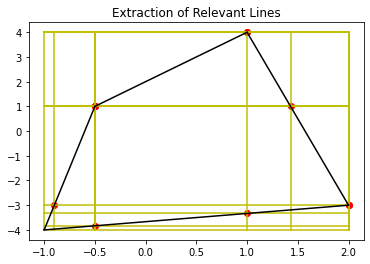

In [17]:

fig = plt.figure()

plt.title('Extraction of Relevant Lines')



for edge in v_lines:
    x_1,x_2 = edge[0][0], edge[1][0]
    y_1,y_2 = edge[0][1], edge[1][1]
    plt.plot([x_1,x_2], [y_1,y_2],color='y')

for edge in h_lines:
    x_1,x_2 = edge[0][0], edge[1][0]
    y_1,y_2 = edge[0][1], edge[1][1]
    plt.plot([x_1,x_2], [y_1,y_2],color='y')

for edge in edge_pts:
    x_1,x_2 = edge[0][0], edge[1][0]
    y_1,y_2 = edge[0][1], edge[1][1]
    plt.plot([x_1,x_2], [y_1,y_2], color='k')    
    
for x,y in intersection_pts:
    plt.scatter(x,y,color='r')
    
plt.savefig('Extraction of Relevant Lines.png', format='png')

#### Algorithm 1: Examining the type of edges in a polygon 

In [18]:
def edge_types(edges):
    """
    args: vertices v_1,...,v_4
    returns a dictionary mapping edges to edge types based of vertices
    """

    
    edge_types = dict()
    edges_rev = [edges[3],edges[2],edges[1],edges[0]]
    for edge in edges_rev:
        x_start, x_end = edge[0][0], edge[1][0]
        y_start, y_end = edge[0][1], edge[1][1]
        e  = (tuple(edge[0]), tuple(edge[1]))
        if (x_start < x_end and y_end > y_start):
            edge_types[e] = 1
        elif (x_start > x_end and y_end > y_start):
            edge_types[e] = 2
        elif (x_start > x_end and y_end < y_start):
            edge_types[e] = 3
        elif (x_start < x_end and y_end < y_start):
            edge_types[e] = 4
        elif (x_start == x_end and y_end > y_start):
            edge_types[e] = 5
        elif (x_start > x_end and y_end == y_start):
            edge_types[e] = 6
        elif (x_start == x_end and y_end < y_start):
            edge_types[e] = 7
        else:
            if (x_start < x_end and y_end == y_start):
                edge_types[e] = 8
            else:
                raise ValueError("Invalid set of vertices given")
    return edge_types
    

In [19]:
types = edge_types(edge_pts)

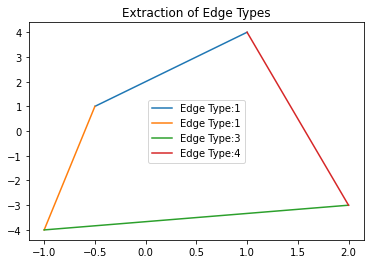

In [20]:

plt.title('Extraction of Edge Types')
for edge, edge_type in types.items():
    x_1,x_2 = edge[0][0], edge[1][0]
    y_1,y_2 = edge[0][1], edge[1][1]
    plt.plot([x_1,x_2], [y_1,y_2], label=f'Edge Type:{edge_type}')    
plt.legend() 
plt.savefig('Extraction of Edge Types.png', format='png')

In [21]:
def extract_rectangles(h_lines, v_lines):
    h_lines = sorted(list(set(h_lines)), key=lambda x: x[0][1]) 
    v_lines = sorted(list(set(v_lines)), key=lambda x: x[0][0])
    print(v_lines)
    rectangles = []
    for h in range(1, len(h_lines)):
        for v in range(1, len(v_lines)):
            t_l = line_intersection(h_lines[h-1], v_lines[v-1])
            t_r = line_intersection(h_lines[h-1], v_lines[v])
            b_l = line_intersection(h_lines[h], v_lines[v-1])
            b_r = line_intersection(h_lines[h], v_lines[v])
            rectangle = [t_l, t_r, b_r, b_l]
            rectangles.append(rectangle)
    return rectangles

In [22]:
rectangles = extract_rectangles(h_lines, v_lines)

[((-1, -4), (-1, 4)), ((-0.9, -4), (-0.9, 4)), ((-0.5, -4), (-0.5, 4)), ((1, -4), (1, 4)), ((1.4285714285714286, -4), (1.4285714285714286, 4)), ((2, -4), (2, 4))]


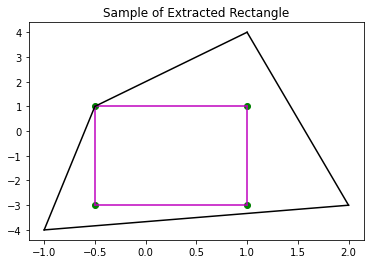

In [23]:
fig = plt.figure()
plt.title("Sample of Extracted Rectangle")
to_display = 17

for edge in edges(rectangles[to_display]):
    x_1,x_2 = edge[0][0], edge[1][0]
    y_1,y_2 = edge[0][1], edge[1][1]
    plt.plot([x_1,x_2], [y_1,y_2], color='m') 
for x,y in rectangles[to_display]:
    plt.scatter(x,y,color='g')
    
for edge in edge_pts:
    x_1,x_2 = edge[0][0], edge[1][0]
    y_1,y_2 = edge[0][1], edge[1][1]
    plt.plot([x_1,x_2], [y_1,y_2],color='k')

plt.savefig('Extracted Rectangle.png', format='png')

#### Algorithm 2: Filtering the relevant rectangles: 

We propose two metrics for filtering the relevant rectangles: 

1: Area-Based Filtering

For a proposed rectangle, we compute the area of the rectangle $R$ and the area of intersection $R'$ of the rectangle with the respective quadrilateral. Then, if the proportion of intersected area $A = \frac{R'}{R}$ is less than a threshold parameter $\gamma$, we filter the rectangle. Take note here, that setting $\gamma = 1$ assures we only keep the fully inscribed rectangles

2: Corner-Based Filtering

For a proposed rectangle, we evaluate whether the four corners of the rectangle are within the closed interior defined by the quadrilateral. If the number of corners that are within the closed interior is less than a count $k$ we filter the rectangle. Take note here, that setting $k = 4$ assures we only keep the fully inscribed rectangles.

In [24]:
def area_based_filter(rectangles, quad, threshold=0.5):
    filtered_rectangles = []
    polygon = Polygon(quad)
    for rect in rectangles:
        poly_rect = Polygon(rect) 
        intersection = polygon.intersection(poly_rect)
        intersection_2 = poly_rect.intersection(polygon)
        if (intersection.area / poly_rect.area) >= threshold:
            filtered_rectangles.append(rect)
    return filtered_rectangles

In [25]:
a_f = area_based_filter(rectangles, points)

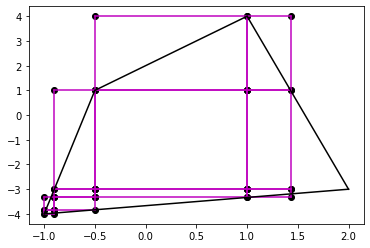

In [26]:
for rect in a_f:
    for edge in edges(rect):
        x_1,x_2 = edge[0][0], edge[1][0]
        y_1,y_2 = edge[0][1], edge[1][1]
        plt.plot([x_1,x_2], [y_1,y_2], color='m')
    for x,y in rect:
        plt.scatter(x,y,color='k')

for edge in edge_pts:
    x_1,x_2 = edge[0][0], edge[1][0]
    y_1,y_2 = edge[0][1], edge[1][1]
    plt.plot([x_1,x_2], [y_1,y_2],color='k')

In [27]:
def corner_based_filter(rectangles, quad, intersection_pts, count=4):
    filtered_rectangles = []
    polygon = Polygon(quad)
    for rect in rectangles:
        edge_cnt = 0
        for x,y in rect:
            pt = Point(x,y)
            if polygon.contains(pt) or (x,y) in intersection_pts:
                edge_cnt += 1
        if edge_cnt >= count:
            filtered_rectangles.append(rect)
    return filtered_rectangles

In [28]:
a_c = corner_based_filter(rectangles, points, intersection_pts)

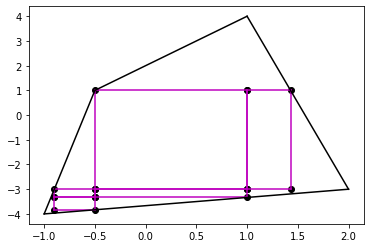

In [29]:
for rect in a_c:
    for edge in edges(rect):
        x_1,x_2 = edge[0][0], edge[1][0]
        y_1,y_2 = edge[0][1], edge[1][1]
        plt.plot([x_1,x_2], [y_1,y_2], color='m')
    for x,y in rect:
        plt.scatter(x,y,color='k')

for edge in edge_pts:
    x_1,x_2 = edge[0][0], edge[1][0]
    y_1,y_2 = edge[0][1], edge[1][1]
    plt.plot([x_1,x_2], [y_1,y_2],color='k')

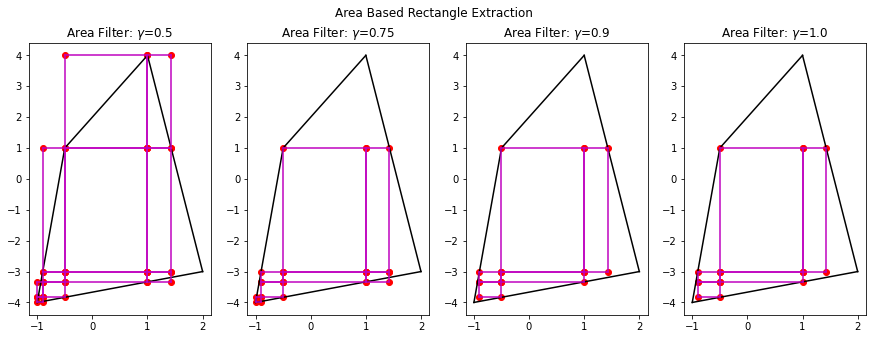

In [33]:
fig, axes = plt.subplots(1,4,figsize=(15,5))
fig.suptitle('Area Based Rectangle Extraction')
for i, thresh in enumerate([0.5, 0.75, 0.9, 1.0]):
    ax = axes[i]
    a_f = area_based_filter(rectangles, points, threshold=thresh)
    ax.set_title(f'Area Filter: $\gamma$={thresh}')
    for edge in edges(points):
        x_1,x_2 = edge[0][0], edge[1][0]
        y_1,y_2 = edge[0][1], edge[1][1]
        ax.plot([x_1,x_2], [y_1,y_2], color='k')
    for rect in a_f:
        for edge in edges(rect):
            x_1,x_2 = edge[0][0], edge[1][0]
            y_1,y_2 = edge[0][1], edge[1][1]
            ax.plot([x_1,x_2], [y_1,y_2], color='m')
        for x,y in rect:
            ax.scatter(x,y,color='r')
fig.savefig('Area Based Rectangle Extraction.png', format='png')

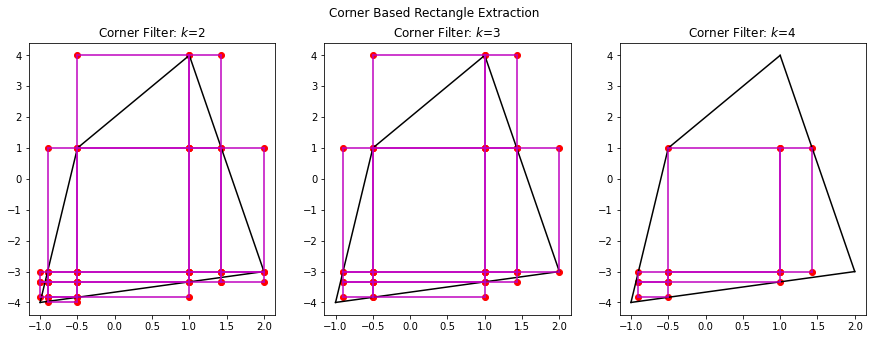

In [32]:
fig, axes = plt.subplots(1,3,figsize=(15,5))
fig.suptitle('Corner Based Rectangle Extraction')
for i, ct in enumerate([2,3,4]):
    ax = axes[i]
    a_f = corner_based_filter(rectangles, points, intersection_pts,count=ct)
    ax.set_title(f'Corner Filter: $k$={ct}')
    for edge in edges(points):
        x_1,x_2 = edge[0][0], edge[1][0]
        y_1,y_2 = edge[0][1], edge[1][1]
        ax.plot([x_1,x_2], [y_1,y_2], color='k')
    for rect in a_f:
        for edge in edges(rect):
            x_1,x_2 = edge[0][0], edge[1][0]
            y_1,y_2 = edge[0][1], edge[1][1]
            ax.plot([x_1,x_2], [y_1,y_2], color='m')
        for x,y in rect:
            ax.scatter(x,y,color='r')
fig.savefig('Corner Based Rectangle Extraction.png', format='png')